In [1]:
!pip install torch networkx openpyxl matplotlib scipy tqdm networkx_temporal pandas --q

In [2]:
# pip install --upgrade --force-reinstall pandas

In [3]:
import numpy as np
import pandas as pd

## Dataset Setup

In [4]:
# import pandas as pd
import torch
import os
import json 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy
from StockPriceEmbedding import get_embedding_model, generate_embeddings_dict
from SentimentEmbedding import get_sentiment_embedding_model, generate_sentiment_embeddings_dict
# from TGAT import get_tgat_model, train_tgat_model, test_tgat_model

In [5]:
def visualize_knn_graph(
    adjacency_matrix,
    node_size=50,
    edge_min_alpha=0.1,
    edge_max_alpha=1.0,
    title="KNN Graph",
    filepath="knn_graph.png",
):
    """
    Visualize the KNN graph using NetworkX, without node labels and with node size and edge alpha adjustments.
    Args:
    - adjacency_matrix: The adjacency matrix representing the KNN graph.
    - node_size: Size of the nodes in the visualization (default: 50).
    - edge_min_alpha: Minimum alpha (transparency) for edges (default: 0.1 for long distances).
    - edge_max_alpha: Maximum alpha for edges (default: 1.0 for short distances).
    """
    # Create a NetworkX graph from the adjacency matrix
    G = nx.Graph()
    # Add edges to the graph based on non-zero values in the adjacency matrix
    n_samples = adjacency_matrix.shape[0]
    for i in range(n_samples):
        for j in range(n_samples):
            if adjacency_matrix[i, j] > 0:  # Only add edges with non-zero weights
                G.add_edge(i, j, weight=adjacency_matrix[i, j])
    # Visualize the graph
    plt.figure(figsize=(12, 12))
    # Use spring layout for better visualization
    pos = nx.spring_layout(G)
    # Draw nodes with smaller size and no labels
    nx.draw_networkx_nodes(
        G, pos, node_size=node_size, node_color="lightblue", alpha=0.3
    )
    # Normalize the edge weights to calculate alpha values for transparency
    weights = [G[u][v]["weight"] for u, v in G.edges()]
    max_weight = max(weights)
    min_weight = min(weights)
    # Calculate edge alpha values based on normalized weights (for transparency)
    edge_alphas = [
        edge_min_alpha
        + (edge_max_alpha - edge_min_alpha)
        * ((w - min_weight) / (max_weight - min_weight))
        for w in weights
    ]
    # Draw edges with transparency proportional to distance
    edges = nx.draw_networkx_edges(
        G, pos, edge_color="gray", alpha=edge_alphas, width=1
    )
    # Add a title and show the graph
    plt.title(title)
    # plt.savefig(filepath, format="png", dpi=600)  # Change format and dpi as needed
    plt.show()

Processing year: 2000
Extracted adjacency_matrix of shape: (1872, 1872)


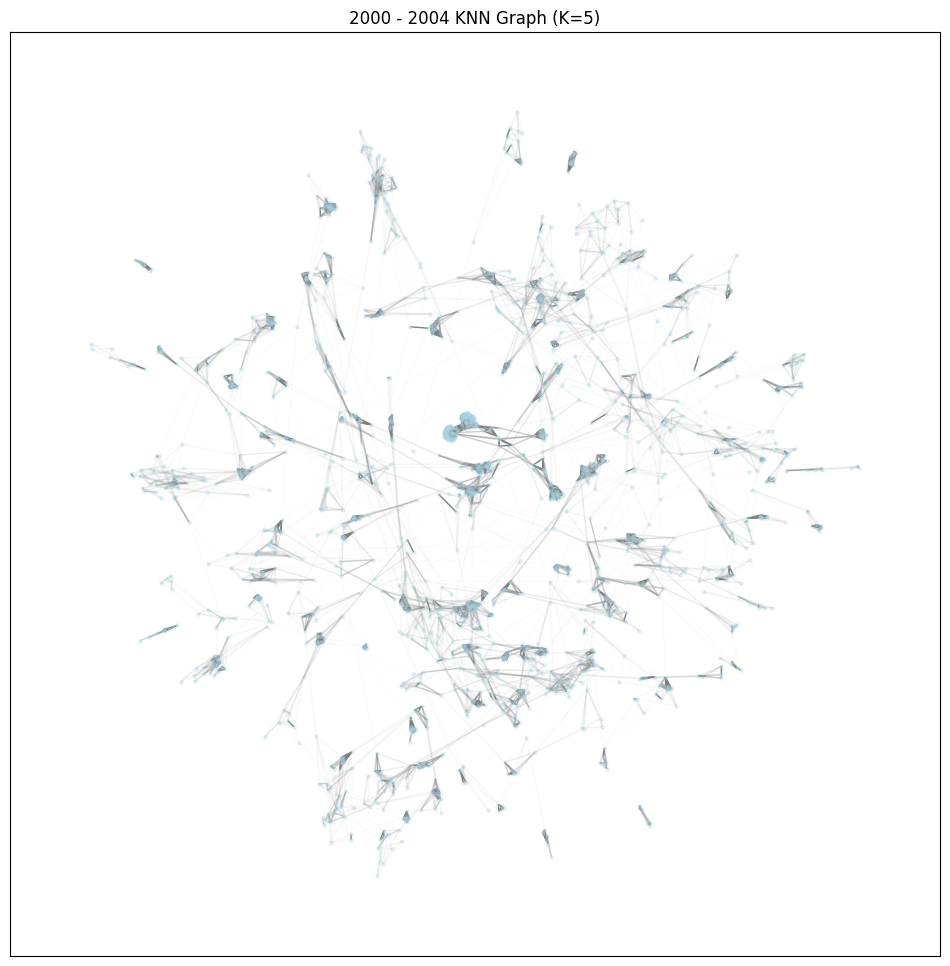

Processing year: 2005
Extracted adjacency_matrix of shape: (1892, 1892)


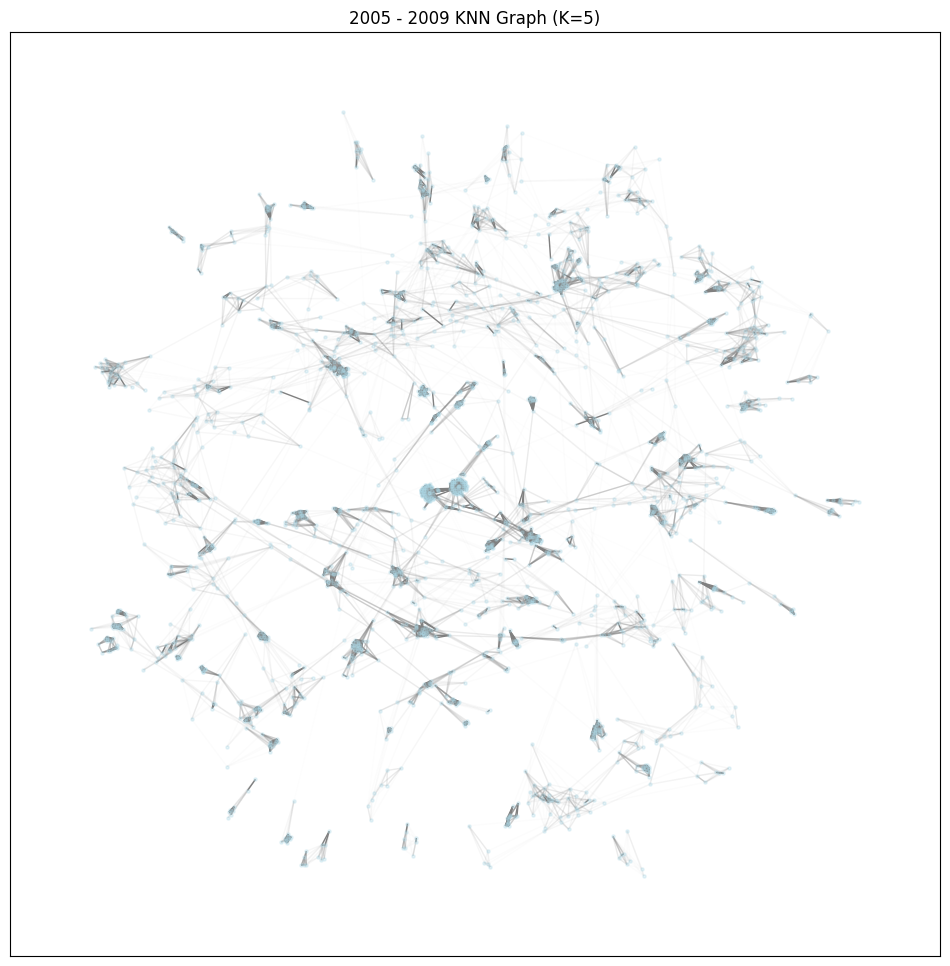

Processing year: 2010
Extracted adjacency_matrix of shape: (1893, 1893)


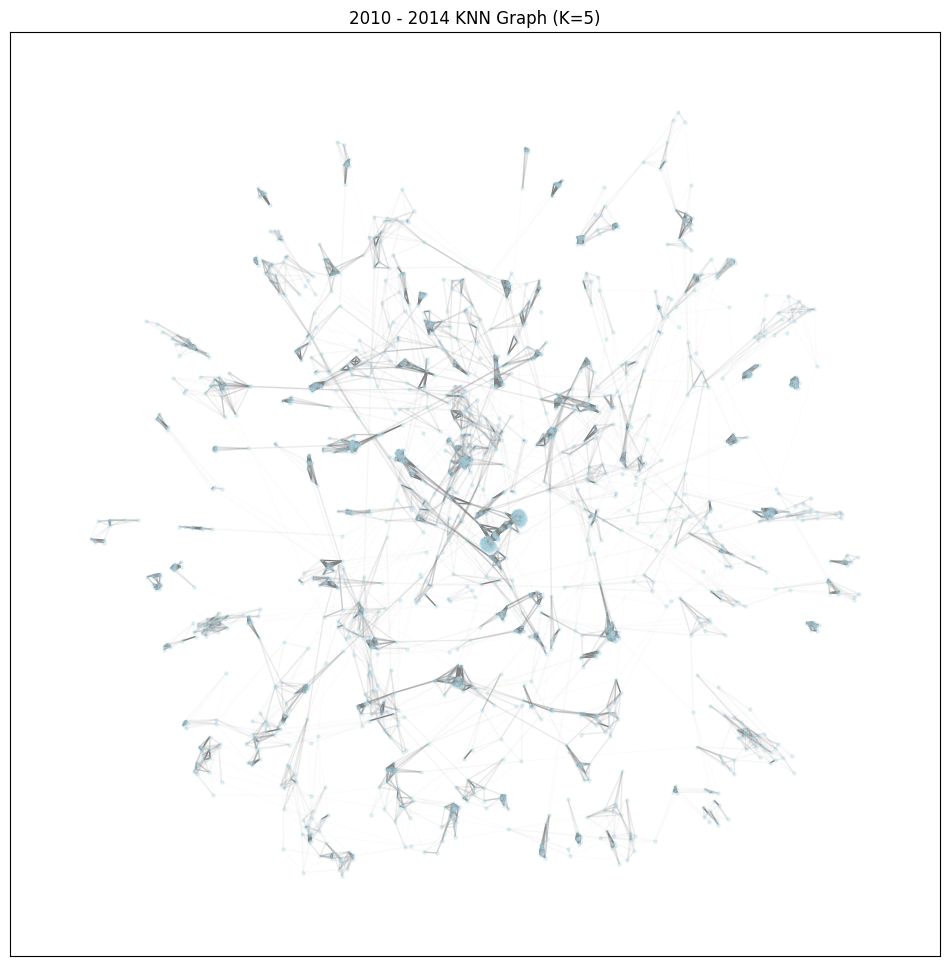

Processing year: 2015
Extracted adjacency_matrix of shape: (1897, 1897)


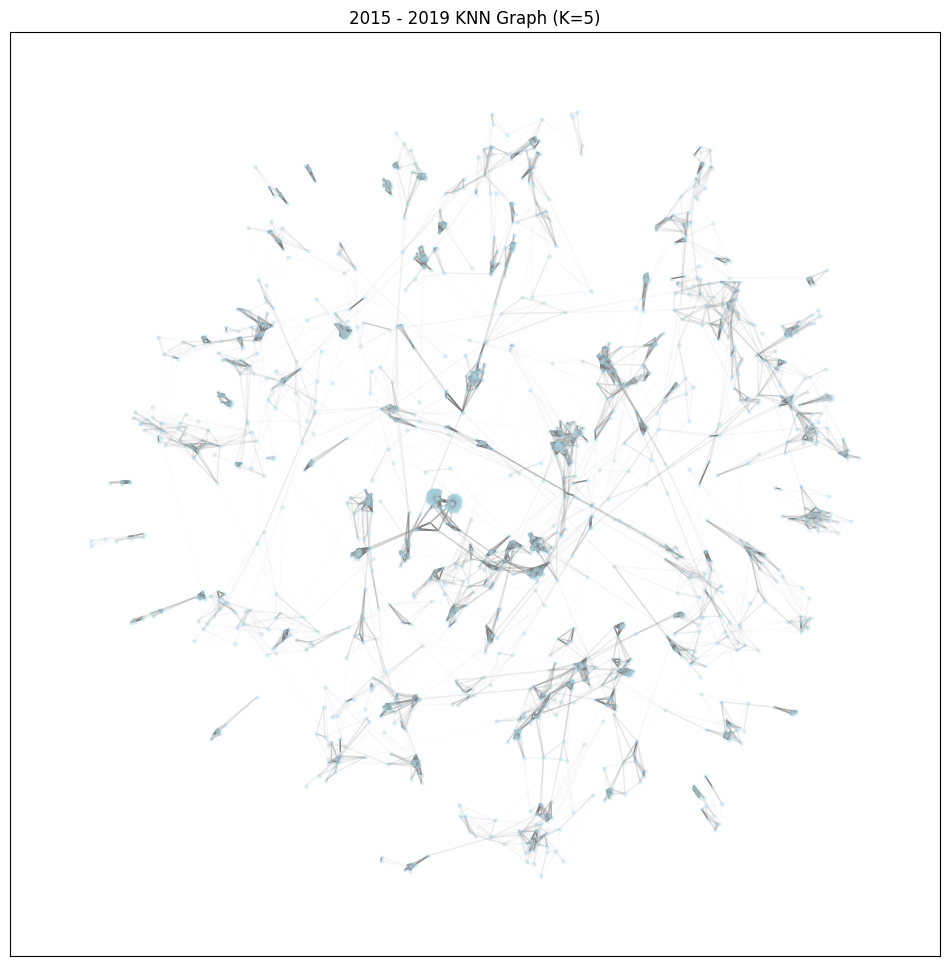

Processing year: 2020
Extracted adjacency_matrix of shape: (1902, 1902)


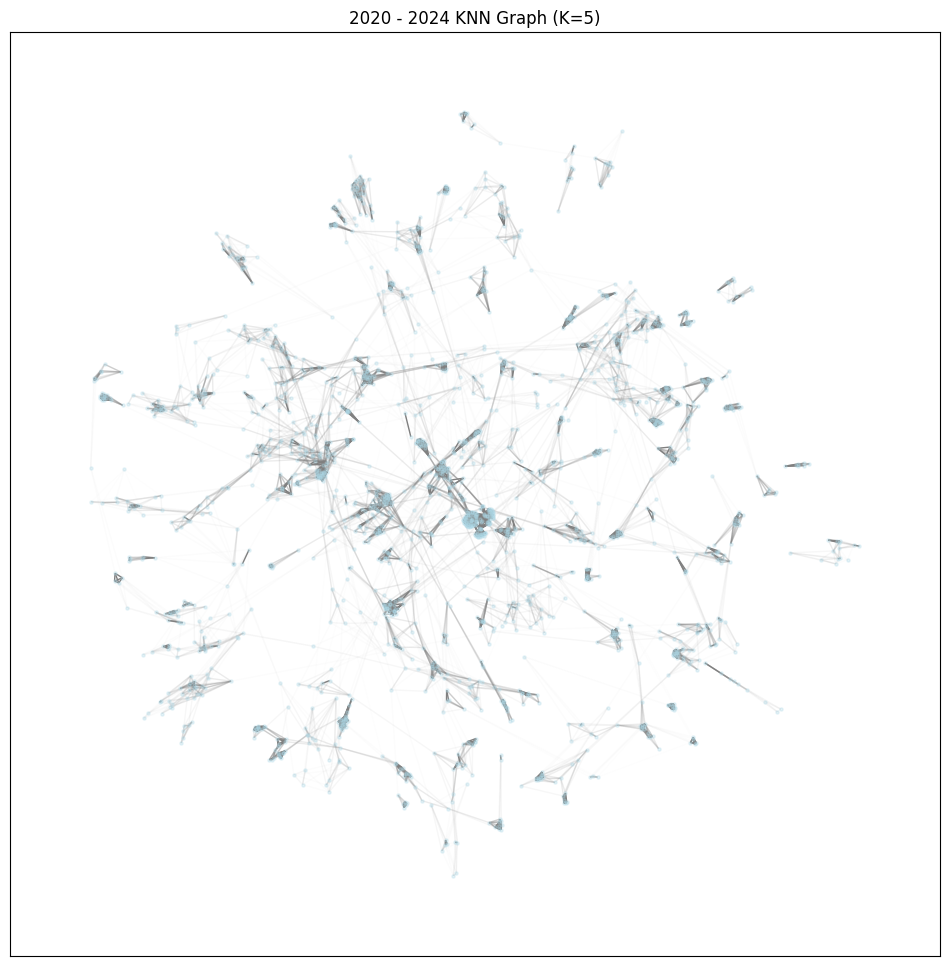

In [6]:
BASE_PATH = os.getcwd()
years = [2000, 2005, 2010, 2015, 2020]

for year in years:
    print(f"Processing year: {year}")
    
    # Load the adjacency matrix
    adjacency_matrix = np.load(
        os.path.join(BASE_PATH, "data", str(year), "sector_adj_matrix.npy"),
        allow_pickle=True  # Enable loading object arrays
    )

    # Check if adjacency_matrix is an object (e.g., list, dictionary, or sparse matrix)
    if isinstance(adjacency_matrix.item(), (np.ndarray, scipy.sparse.csr_matrix)):
        # Extract the actual matrix if it’s wrapped in an object
        adjacency_matrix = adjacency_matrix.item()
        print(f"Extracted adjacency_matrix of shape: {adjacency_matrix.shape}")
    else:
        print(f"Unexpected format for year {year}. adjacency_matrix is not an array or sparse matrix.")
        continue  # Skip to the next year if format is incorrect

    # If it's sparse, convert to dense
    if scipy.sparse.issparse(adjacency_matrix):
        adjacency_matrix = adjacency_matrix.toarray()

    # Proceed to visualize if it's now a valid 2D array
    if adjacency_matrix.ndim == 2:
        visualize_knn_graph(
            adjacency_matrix=adjacency_matrix,
            title=f"{int(year)} - {int(year) + 4} KNN Graph (K=5)",
            filepath=os.path.join(BASE_PATH, "data", str(year), "sector_knn_graph.png"),
            node_size=5,
            edge_min_alpha=0.01,
            edge_max_alpha=1.0,
        )
    else:
        print(f"The adjacency matrix format for year {year} is incompatible for visualization.")

In [7]:
# df_test = pd.read_csv(os.path.join(BASE_PATH,'data', "sentiment.csv"))
# print(df_test.head())
# print(sorted(pd.unique(df_test['year'])))
# all_stocks = np.concatenate(df_test['stocks_appeared'].apply(lambda x: eval(x) if isinstance(x, str) else x).values)
# unique_stocks = np.unique(all_stocks)
# print("\n\n")
# print("Unique stocks appeared:")
# # print(unique_stocks)
# print(len(unique_stocks))
# print("\n\n")
# print(df_test['sentiment_score'].max())
# print(df_test['sentiment_score'].min())
# print("\n\n")

# year_ranges = ["2000", "2005", "2010", "2015", "2020"]

# yearly_graph_stats = {}

# for year in year_ranges:
#     adj_matrix_path = os.path.join(BASE_PATH, "data", year, "sector_adj_matrix.npy")
    
#     # Load adjacency matrix with allow_pickle=True
#     adj_matrix = np.load(adj_matrix_path, allow_pickle=True)
    
#     # If the matrix is wrapped in an object, extract it
#     if isinstance(adj_matrix.item(), (np.ndarray, scipy.sparse.csr_matrix)):
#         adj_matrix = adj_matrix.item()
    
#     # Convert to dense if sparse
#     if scipy.sparse.issparse(adj_matrix):
#         adj_matrix = adj_matrix.toarray()
    
#     # Calculate number of nodes and edges
#     num_nodes = adj_matrix.shape[0]
#     num_edges = np.count_nonzero(adj_matrix) // 2  # Divide by 2 for undirected edges
    
#     # Store stats in dictionary
#     yearly_graph_stats[year] = {
#         "nodes": num_nodes,
#         "edges": num_edges
#     }

# # Print stats
# print("Number of nodes and edges in each adjacency matrix:")
# for year, stats in yearly_graph_stats.items():
#     print(f"Year {year}: Nodes = {stats['nodes']}, Edges = {stats['edges']}")




In [8]:
# matches_count = {}

# year_ranges = {
#     "2000": (2000, 2004),
#     "2005": (2005, 2009),
#     "2010": (2010, 2014),
#     "2015": (2015, 2019),
#     "2020": (2020, 2024)
# }

# for foldername, (start_year, end_year) in year_ranges.items():
#     node_to_tic_path = os.path.join(BASE_PATH, 'data', foldername, "sector_node_to_tic.json")
#     with open(node_to_tic_path, 'r') as f:
#         node_to_tic = json.load(f)
    
#     # Define nodes_set from node_to_tic values (tickers)
#     nodes_set = set(node_to_tic.values())
#     total_nodes_in_folder = len(nodes_set)
    
#     # Filter df_test for the current year range
#     year_df = df_test[(df_test['year'] >= start_year) & (df_test['year'] <= end_year)]
    
#     # Initialize a set to track matched companies
#     matched_companies = set()
    
#     for companies in year_df['stocks_appeared']:
#         if isinstance(companies, str):
#             companies = eval(companies)

#         # Add companies to matched_companies only if they are in nodes_set
#         matched_companies.update(company for company in companies if company in nodes_set)
    
#     # Calculate the total unique matches
#     match_count = len(matched_companies)
    
#     # Calculate match percentage
#     match_percentage = (match_count / total_nodes_in_folder) * 100 if total_nodes_in_folder > 0 else 0
#     matches_count[foldername] = (match_count, total_nodes_in_folder, match_percentage)

# # Print match results
# print("Match count for each folder (found / total in folder):")
# for foldername, (found, total, percentage) in matches_count.items():
#     print(f"{foldername}: {found} / {total} ({percentage:.2f}%)")

In [9]:
# import pandas as pd
# import numpy as np
# import os
# from collections import defaultdict
# from datetime import datetime
# import json

# # Define year ranges for each 5-year period
# year_ranges = {
#     "2000": (2000, 2004),
#     "2005": (2005, 2009),
#     "2010": (2010, 2014),
#     "2015": (2015, 2019),
#     "2020": (2020, 2024)
# }

# # Initialize a dictionary to hold monthly sentiment scores
# monthly_sentiment_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# # Loop through each period and calculate average sentiment scores
# for foldername, (start_year, end_year) in year_ranges.items():
#     node_to_tic_path = os.path.join(BASE_PATH, "data", foldername, "sector_node_to_tic.json")
#     with open(node_to_tic_path, 'r') as f:
#         node_to_tic = json.load(f)
    
#     nodes_set = set(node_to_tic.values())

#     # Loop through each row in df_test to gather sentiment scores by ticker
#     for _, row in df_test.iterrows():
#         year = row['year']
#         timestamp = datetime.fromisoformat(row['timestamp_dt'])
#         month = timestamp.month
#         sentiment_score = row['sentiment_score']
        
#         # Check if the row's year is within the specified range
#         if start_year <= year <= end_year:
#             stocks_appeared = eval(row['stocks_appeared'])
#             for stock in stocks_appeared:
#                 if stock in nodes_set:
#                     monthly_sentiment_dict[year][month][stock].append(sentiment_score)
#     print(f"Processed for {foldername}")

# # Calculate the average sentiment score for each ticker for each month in each 5-year period
# monthly_avg_sentiment = []
# for year, months in monthly_sentiment_dict.items():
#     for month, stocks in months.items():
#         for stock, scores in stocks.items():
#             avg_sentiment = np.mean(scores)
#             monthly_avg_sentiment.append({"Year": year, "Month": month, "Ticker": stock, "avg_sentiment": avg_sentiment})

# # Convert to DataFrame for easier manipulation and saving to CSV
# monthly_avg_sentiment_df = pd.DataFrame(monthly_avg_sentiment)

In [10]:
# sentiment_df = pd.concat(avg_sentiment_dfs, names=["Year", "Ticker"])
# monthly_avg_sentiment_df.to_csv(f"{BASE_PATH}/data/sentiment_combined.csv", index=False)

sentiment_df = pd.read_csv(BASE_PATH + '/data/sentiment_combined.csv')

In [11]:
print(sentiment_df.head())

print(np.unique(sentiment_df['Month']))

   Year  Month Ticker  avg_sentiment
0  2009     11   CHDN       0.999300
1  2009     11    GFI       0.800368
2  2009     11    RSG       0.998217
3  2009     11    TRI       0.999300
4  2009     11    WTM       0.014100
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [12]:
# import time
# start_time = time.time()
# print("big data set loading started")
# feature_cols = [
# "prccd","prchd","prcld","prcod"
# ]

# full_df = pd.read_csv(
#     os.path.join(BASE_PATH, "data", "comp_na_daily_all.txt"),
#     usecols=["datadate", "tic", "conm"] + feature_cols,
#     sep="\t",
#     parse_dates=["datadate"],
# )
# full_df['year'] = full_df['datadate'].dt.year
# full_df = full_df.replace('NaN', 0)
# print(f"It took {time.time() - start_time:.2f}s")

In [13]:
# # Replace NaN values in specific columns with their respective means
# for column in ['prccd', 'prchd', 'prcld', 'prcod']:
#     column_mean = full_df[column].mean()
#     full_df[column] = full_df[column].fillna(column_mean)
# full_df.head()

In [14]:
# full_df.to_csv(f"{BASE_PATH}/data/full_df.csv", index=True)
full_df = pd.read_csv(BASE_PATH + '/data/full_df.csv')
full_df.head()

,Unnamed: 0,datadate,tic,conm,prccd,prchd,prcld,prcod,year
0,0,2000-01-03,AIR,AAR CORP,17.5625,18.00,17.5625,38.659014,2000
1,1,2000-01-04,AIR,AAR CORP,17.6250,18.00,17.2500,38.659014,2000
2,2,2000-01-05,AIR,AAR CORP,17.8125,18.00,17.5000,38.659014,2000
3,3,2000-01-06,AIR,AAR CORP,17.9375,18.00,17.5625,38.659014,2000
4,4,2000-01-07,AIR,AAR CORP,18.5625,19.25,17.9375,38.659014,2000


## FEATURE ENCODING (AUTOENCODER)

In [15]:
"""
features (ss, price (o, c -> o:c ) => LSTM => NODE EMB (one hot) 1

for now I have got:

Avg sentiment accross all the years: pd dataframe which takes an avg of the whole year
KNN graph wrt the sector where K = 5

also in the comp_na_daily_all.txt
-> prccd 	Decimal 	Price - Close - Daily (prccd) 
-> prchd 	Decimal 	Price - High - Daily (prchd)
-> prcld 	Decimal 	Price - Low - Daily (prcld)
-> prcod 	Decimal 	Price - Open - Daily (prcod)
-> I will create a time series embedding for this in the range of 5 years using the 4 values so that we can capture the trend all along

cosine

[one hot] x [avg ss] x [o:c] x [something else] => [node emb]

[one hot] ?    [64 x 1]        x        [64 x 1]           => [node emb]
            price time series       sentiment time series 
               vector                    vector

"""

'\nfeatures (ss, price (o, c -> o:c ) => LSTM => NODE EMB (one hot) 1\n\nfor now I have got:\n\nAvg sentiment accross all the years: pd dataframe which takes an avg of the whole year\nKNN graph wrt the sector where K = 5\n\nalso in the comp_na_daily_all.txt\n-> prccd \tDecimal \tPrice - Close - Daily (prccd) \n-> prchd \tDecimal \tPrice - High - Daily (prchd)\n-> prcld \tDecimal \tPrice - Low - Daily (prcld)\n-> prcod \tDecimal \tPrice - Open - Daily (prcod)\n-> I will create a time series embedding for this in the range of 5 years using the 4 values so that we can capture the trend all along\n\ncosine\n\n[one hot] x [avg ss] x [o:c] x [something else] => [node emb]\n\n[one hot] ?    [64 x 1]        x        [64 x 1]           => [node emb]\n            price time series       sentiment time series \n               vector                    vector\n\n'

In [23]:
# DATA PREPROCESS

autoencoder = get_embedding_model(full_df)

year_ranges = {
    "2000": (2000, 2004),
    "2005": (2005, 2009),
    "2010": (2010, 2014),
    "2015": (2015, 2019),
    "2020": (2020, 2024)
}
batch_size = 32

# Generate embeddings
embeddings_dict = generate_embeddings_dict(autoencoder, full_df, year_ranges, batch_size=batch_size, base_path=BASE_PATH)

# Convert embeddings_dict to DataFrame if needed
embeddings_df = pd.DataFrame(
    [(period, ticker, *embedding) for period, tickers in embeddings_dict.items() for ticker, embedding in tickers.items()],
    columns=['period', 'ticker'] + list(range(len(next(iter(next(iter(embeddings_dict.values())).values())))))
)

KeyboardInterrupt: 

In [17]:
# DATA PREPROCESS

sentiment_encoder = get_sentiment_embedding_model(sentiment_df)

year_ranges = {
    "2000": (2000, 2004),
    "2005": (2005, 2009),
    "2010": (2010, 2014),
    "2015": (2015, 2019),
    "2020": (2020, 2024)
}
batch_size = 12

sentiment_embeddings_dict = generate_sentiment_embeddings_dict(sentiment_encoder, sentiment_df, year_ranges, batch_size=batch_size, base_path=BASE_PATH)

sentiment_embeddings_df = pd.DataFrame(
    [(period, ticker, *embedding) for period, tickers in embeddings_dict.items() for ticker, embedding in tickers.items()],
    columns=['period', 'ticker'] + list(range(len(next(iter(next(iter(embeddings_dict.values())).values())))))
)

Total monthly sequences created: 118209
torch.Size([118209, 12])


Epoch [1/50], Average Loss: 0.0542


Epoch [2/50], Average Loss: 0.0158


Epoch [3/50], Average Loss: 0.0100


Epoch [4/50], Average Loss: 0.0068


Epoch [5/50], Average Loss: 0.0055


Epoch [6/50], Average Loss: 0.0052


Epoch [7/50], Average Loss: 0.0053


Epoch [8/50], Average Loss: 0.0056


Epoch [9/50], Average Loss: 0.0057


Epoch [10/50], Average Loss: 0.0060


Epoch [11/50], Average Loss: 0.0063
Stopping early at epoch 11 due to no improvement in loss for 5 consecutive epochs.
Processing period: 2000-2004


Processing Companies for 2000: 100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 102.31it/s]


Processing period: 2005-2009


Processing Companies for 2005: 100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 104.05it/s]


Processing period: 2010-2014


Processing Companies for 2010: 100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 67.82it/s]


Processing period: 2015-2019


Processing Companies for 2015: 100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 54.54it/s]


Processing period: 2020-2024


Processing Companies for 2020: 100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.05it/s]


In [18]:
print(f"5-Year Embeddings DataFrame: {embeddings_df.shape}")
embeddings_df.head()

5-Year Embeddings DataFrame: (498, 66)


,period,ticker,0,1,2,3,4,5,6,7,...,54,55,56,57,58,59,60,61,62,63
0,2000,ARE,0.000000,0.0,0.0,0.0,0.0,0.0,21.863348,0.0,...,0.0,5.900553,0.0,0.000000,0.0,69.573608,0.0,0.0,0.0,0.0
1,2000,AXTI,18.355314,0.0,0.0,0.0,0.0,0.0,79.553848,0.0,...,0.0,28.351095,0.0,20.917646,0.0,39.258461,0.0,0.0,0.0,0.0
2,2000,ABEO,31.117125,0.0,0.0,0.0,0.0,0.0,110.646248,0.0,...,0.0,40.206131,0.0,34.138557,0.0,32.255821,0.0,0.0,0.0,0.0
3,2000,AMCRY,2.997023,0.0,0.0,0.0,0.0,0.0,60.834846,0.0,...,0.0,21.754652,0.0,9.995058,0.0,38.998543,0.0,0.0,0.0,0.0
4,2000,APD,0.000000,0.0,0.0,0.0,0.0,0.0,24.048809,0.0,...,0.0,6.701668,0.0,0.000000,0.0,68.308281,0.0,0.0,0.0,0.0


In [19]:
print(f"5-Year Sentiment DataFrame:{sentiment_embeddings_df.shape}")
sentiment_embeddings_df.head()

5-Year Sentiment DataFrame:(498, 66)


,period,ticker,0,1,2,3,4,5,6,7,...,54,55,56,57,58,59,60,61,62,63
0,2000,ARE,0.000000,0.0,0.0,0.0,0.0,0.0,21.863348,0.0,...,0.0,5.900553,0.0,0.000000,0.0,69.573608,0.0,0.0,0.0,0.0
1,2000,AXTI,18.355314,0.0,0.0,0.0,0.0,0.0,79.553848,0.0,...,0.0,28.351095,0.0,20.917646,0.0,39.258461,0.0,0.0,0.0,0.0
2,2000,ABEO,31.117125,0.0,0.0,0.0,0.0,0.0,110.646248,0.0,...,0.0,40.206131,0.0,34.138557,0.0,32.255821,0.0,0.0,0.0,0.0
3,2000,AMCRY,2.997023,0.0,0.0,0.0,0.0,0.0,60.834846,0.0,...,0.0,21.754652,0.0,9.995058,0.0,38.998543,0.0,0.0,0.0,0.0
4,2000,APD,0.000000,0.0,0.0,0.0,0.0,0.0,24.048809,0.0,...,0.0,6.701668,0.0,0.000000,0.0,68.308281,0.0,0.0,0.0,0.0


In [20]:
# # Initialize dictionaries for each year
# year_features = {
#     "2000_features": {},
#     "2005_features": {},
#     "2010_features": {},
#     "2015_features": {},
#     "2020_features": {}
# }

# # Dictionary to store the final features for all years
# complete_features = {}

# # List of years as strings for consistency with dictionary names
# years = ["2000", "2005", "2010", "2015", "2020"]

# # Iterate over each year to populate the dictionaries
# for year in years:
#     features_dict = year_features[f"{year}_features"]  # Get the dictionary for this year

#     # Filter avg_sentiment DataFrame for the current year
#     sentiment_for_year = sentiment_df[sentiment_df['Year'] == int(year)]
#     sentiment_dict = sentiment_for_year.set_index('Ticker')['avg_sentiment'].to_dict()
    
#     for (y, tic), embedding in embeddings_df.iterrows():
#         if int(y) == int(year):  # Check if the current year matches in embeddings_df
#             # Find the sentiment score for this ticker and year from avg_sentiment
#             sentiment_value = sentiment_dict.get(tic)
            
#             if sentiment_value is None:
#                 sentiment_value = 0.5  # Default sentiment value if not found
                
#             # Compute the Kronecker product
#             kronecker_product = np.kron(embedding.values, sentiment_value)
#             features_dict[tic] = kronecker_product
    
#     # Add this year's features to the complete_features dictionary
#     complete_features[f"{year}_features"] = features_dict

# # Print examples to verify the results
# print("2000_features example:", list(complete_features["2000_features"].items())[:1])
# print("2005_features example:", list(complete_features["2005_features"].items())[:1])
# print("2010_features example:", list(complete_features["2010_features"].items())[:1])
# print("2015_features example:", list(complete_features["2015_features"].items())[:1])
# print("2020_features example:", list(complete_features["2020_features"].items())[:1])

## Creating the Temporal Graph

In [31]:
!/home/d/dhansha/miniconda3/bin/python -m pip install networkx-temporal

  Using cached networkx_temporal-1.0-py3-none-any.whl.metadata (5.1 kB)
Using cached networkx_temporal-1.0-py3-none-any.whl (39 kB)


In [30]:
import sys
print(sys.path)

['/home/d/dhansha/miniconda3/lib/python312.zip', '/home/d/dhansha/miniconda3/lib/python3.12', '/home/d/dhansha/miniconda3/lib/python3.12/lib-dynload', '', '/home/d/dhansha/miniconda3/lib/python3.12/site-packages', '/home/d/dhansha/miniconda3/lib/python3.12/site-packages/setuptools/_vendor']


In [32]:
import networkx_temporal as tx

TG = tx.TemporalDiGraph()
BASE_PATH = os.getcwd()

year_ranges = ["2000", "2005", "2010", "2015", "2020"]
# year_ranges = ["2000"]

for year in year_ranges:
    adj_matrix_path = os.path.join(BASE_PATH, "data", year, "sector_adj_matrix.npy")
    
    # Load adjacency matrix with allow_pickle=True
    adj_matrix = np.load(adj_matrix_path, allow_pickle=True)
    
    # If the matrix is wrapped in an object, extract it
    if isinstance(adj_matrix.item(), (np.ndarray, scipy.sparse.csr_matrix)):
        adj_matrix = adj_matrix.item()
    
    # Convert to dense if sparse
    if scipy.sparse.issparse(adj_matrix):
        adj_matrix = adj_matrix.toarray()
    
    node_to_tic_path = os.path.join(BASE_PATH,"data", year, "sector_node_to_tic.json")
    with open(node_to_tic_path, 'r') as f:
        node_to_tic = json.load(f)
    
    # tic_list = list(node_to_tic.values())[:100]
    tic_list = sorted(list(node_to_tic.values()))[:100]
    
    for i in range(adj_matrix.shape[0]):
        for j in range(adj_matrix.shape[1]):
            if adj_matrix[i, j] != 0:

                source = tic_list[i] if i < len(tic_list) else None
                target = tic_list[j] if j < len(tic_list) else None

                if source is not None and target is not None:
                    TG.add_edge(source, target, time=int(year))

print(f"Temporal Graph has {TG.number_of_nodes()} nodes and {TG.number_of_edges()} edges.")

Temporal Graph has [99] nodes and [254] edges.


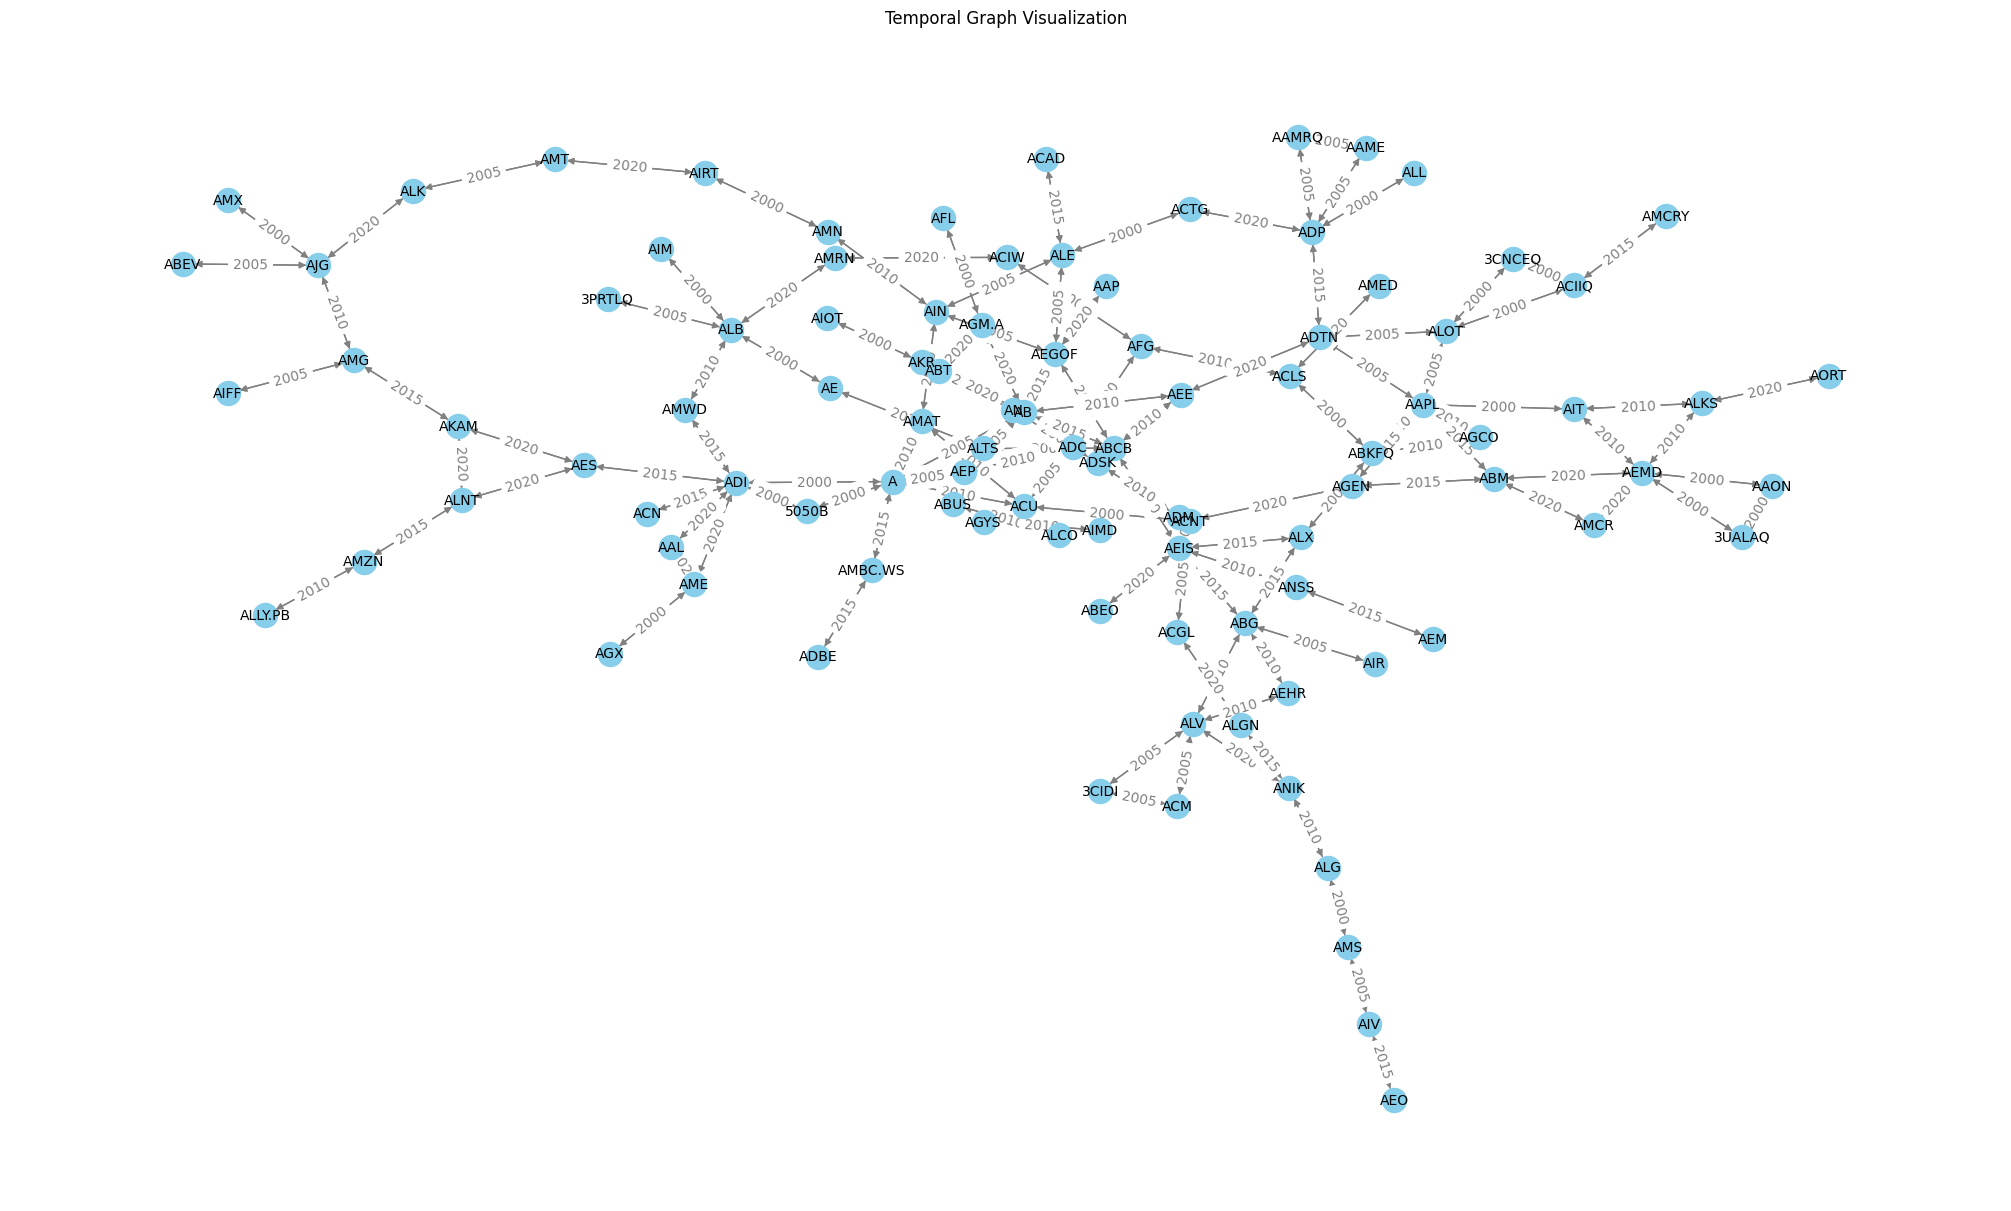

In [33]:
tx.draw(
    TG,
    layout="kamada_kawai",
    figsize=(20, 12),
    node_size=300,               
    edge_color="gray",
    edge_labels="time",          
    font_size=10,              
    node_color="skyblue",      
    suptitle="Temporal Graph Visualization"
)

In [34]:
TG_slice = TG.slice(attr="time")
print(TG_slice)

TemporalDiGraph (t=5) with 188 nodes and 254 edges


In [35]:
print(f"t = {len(TG_slice)} time steps\n"
      f"V = {TG_slice.order()} nodes ({TG_slice.temporal_order()} unique, {TG_slice.total_order()} total)\n"
      f"E = {TG_slice.size()} edges ({TG_slice.temporal_size()} unique, {TG_slice.total_size()} total)")

t = 5 time steps
V = [43, 36, 37, 32, 40] nodes (99 unique, 188 total)
E = [54, 52, 50, 44, 54] edges (254 unique, 254 total)


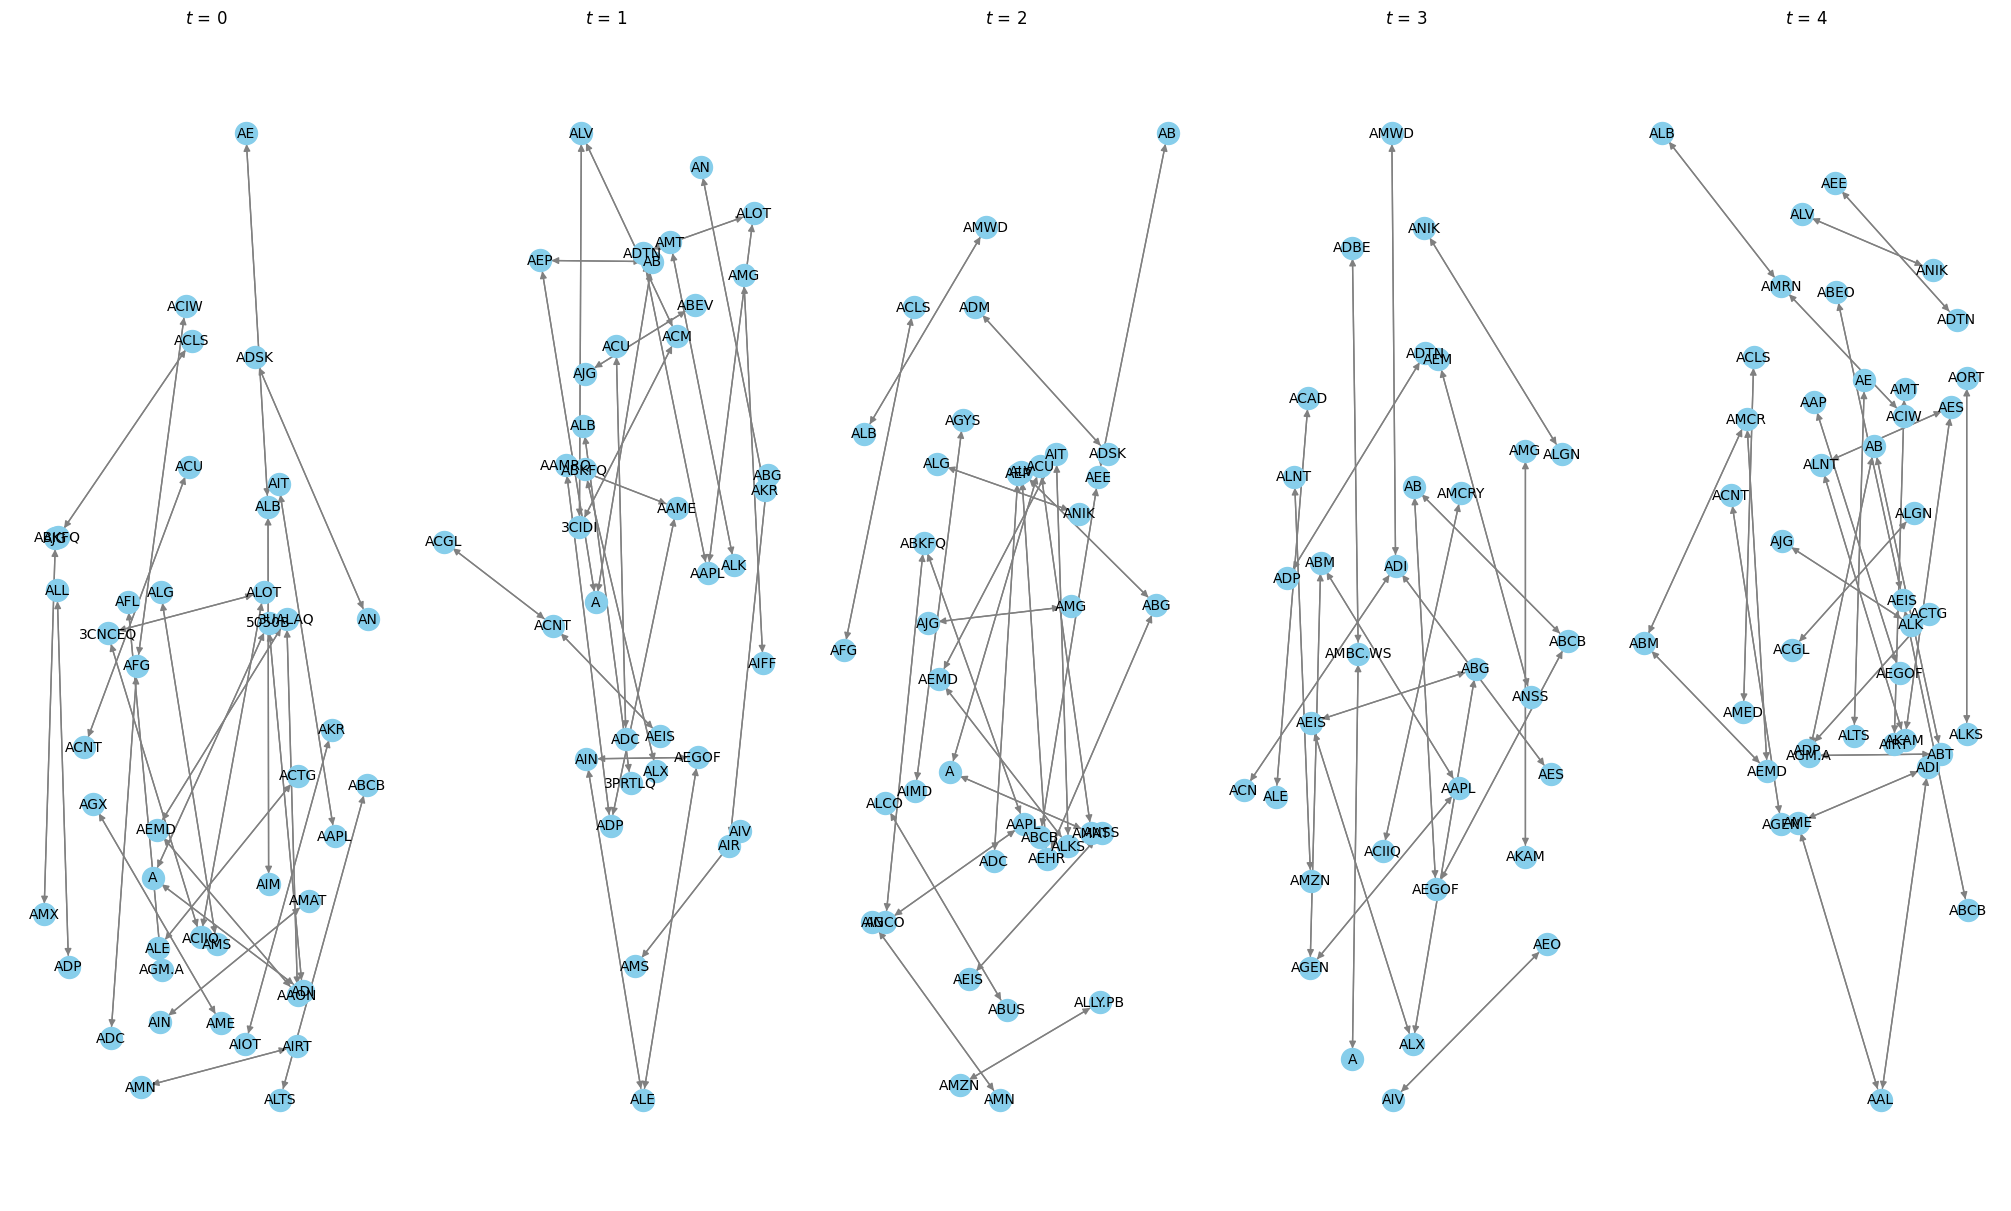

In [36]:
tx.draw(TG_slice, layout="kamada_kawai",edge_color="gray",
    font_size=10,              
    node_color="skyblue",      
    figsize=(20, 12))

## Temporal Graph Attention Network 

In [42]:
!/home/d/dhansha/miniconda3/bin/python -m pip install torch-geometric-temporal --no-deps

  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)


In [ ]:
!/home/d/dhansha/miniconda3/bin/python -m pip install cython torch_sparse torch_scatter torch_geometric decorator==4.4.2

In [ ]:
!/home/d/dhansha/miniconda3/bin/python -m pip uninstall -y torch-sparse torch-geometric

Found existing installation: torch_sparse 0.6.18
Uninstalling torch_sparse-0.6.18:
  Successfully uninstalled torch_sparse-0.6.18
You can safely remove it manually.
Found existing installation: torch-geometric 2.6.1
Uninstalling torch-geometric-2.6.1:
  Successfully uninstalled torch-geometric-2.6.1


In [ ]:
import importlib
import TGAT  # Import your TGAT module

# Reload the TGAT module
importlib.reload(TGAT)

# Now, you can import functions from the reloaded module
from TGAT import get_tgat_model, train_tgat_model, test_tgat_model

In [61]:
# Define model parameters
input_dim = 64
tgat_out_dim = 32
rnn_hidden_dim = 64
hidden_dim = 32
output_dim = 1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize the model
tgat_model = get_tgat_model(input_dim, hidden_dim, tgat_out_dim, rnn_hidden_dim, output_dim, device)

In [110]:
import pandas as pd
import torch

# Define training and testing periods
train_periods = ["2000", "2005", "2010", "2015"]
test_period = "2020"

# Step 1: Aggregate daily close prices to get average monthly prices
full_df['datadate'] = pd.to_datetime(full_df['datadate'])
full_df['Year'] = full_df['datadate'].dt.year
full_df['Month'] = full_df['datadate'].dt.month

# Calculate the average monthly close price per ticker
monthly_avg_prices = full_df.groupby(['Year', 'Month', 'tic'])['prccd'].mean().reset_index()
monthly_avg_prices.rename(columns={'tic': 'Ticker', 'prccd': 'avg_monthly_close_price'}, inplace=True)

# Step 2: Merge average monthly prices with sentiment data
price_sentiment_df = pd.merge(monthly_avg_prices, sentiment_df, on=['Year', 'Month', 'Ticker'], how='inner')

# Fill NaN values in 'avg_monthly_close_price' and 'avg_sentiment' with the column's mean
price_sentiment_df['avg_monthly_close_price'].fillna(price_sentiment_df['avg_monthly_close_price'].mean(), inplace=True)
price_sentiment_df['avg_sentiment'].fillna(price_sentiment_df['avg_sentiment'].mean(), inplace=True)

# Step 3: Calculate sentiment-adjusted price trend for each period
y_targets = {}
for period in train_periods:
    start_year, end_year = int(period), int(period) + 4
    
    # Filter data for the period
    period_data = price_sentiment_df[(price_sentiment_df['Year'] >= start_year) & (price_sentiment_df['Year'] <= end_year)]
    
    # Calculate average price and sentiment over the period
    avg_price = period_data['avg_monthly_close_price'].mean()
    avg_sentiment = period_data['avg_sentiment'].mean()
    
    # Calculate sentiment-adjusted price trend
    sentiment_adjusted_price = avg_price * (1 + avg_sentiment)
    y_targets[period] = [sentiment_adjusted_price]

# Calculate the target for the test period in a similar way
start_year, end_year = int(test_period), int(test_period) + 4
test_data = price_sentiment_df[(price_sentiment_df['Year'] >= start_year) & (price_sentiment_df['Year'] <= end_year)]
avg_test_price = test_data['avg_monthly_close_price'].mean()
avg_test_sentiment = test_data['avg_sentiment'].mean()
y_test_target = [avg_test_price * (1 + avg_test_sentiment)]

# Display the calculated target values
print("Sentiment-Adjusted Price Trend Targets:", y_targets)
print("Sentiment-Adjusted Price Trend Test Target:", y_test_target)

Sentiment-Adjusted Price Trend Targets: {'2000': [nan], '2005': [np.float64(73.98935606697606)], '2010': [np.float64(93.17595453481854)], '2015': [np.float64(125.65677659930252)]}
Sentiment-Adjusted Price Trend Test Target: [np.float64(174.44419325750394)]


In [ ]:
tgat_model = train_tgat_model(tgat_model, train_periods, embeddings_df, sentiment_embeddings_df, TG, y_targets, device, 10)

In [ ]:
# Test the model on the 2020 period with the sentiment-adjusted target
y_test_pred, test_loss = test_tgat_model(tgat_model, test_period, embeddings_df, sentiment_embeddings_df, TG, y_test_target, device)

# Display the prediction and test loss
print("Predicted:", y_test_pred)
print("Test Loss:", test_loss)